# Problem 2

In [3]:
#Importing libraries
from math import exp, sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# One runge-kutta iteration function
def iteration(h, f, x, y):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    r = y + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return x + h, r


In [5]:
# Runge-Kutta process
def runge(t, h, x0, y0, f):
    a = []
    time = []
    a.append(y0)
    time.append(x0)
    x, y = x0, y0
    for i in range(int(t / h)):
        x, y = iteration(h, f, x, y)
        a.append(y)
        time.append(x)
    return time, a

In [6]:
def sys_spin(a, y):
    x = np.zeros(33)
    for i in range(11):
        x[3 * i] = -(y[3 * i + 1] * (0.82) * (y[3 * i - 1] + y[(3 * i + 5) % 33]) + 0.41 * y[3 * i + 2] * (y[3 * i - 2] + y[(3 * i + 4) % 33]))
        x[3 * i + 1] = -(y[3 * i + 2] * (-0.41) * (y[3 * i - 3] + y[(3 * i + 3) % 33]) - (0.82) * y[3 * i] * (y[3 * i - 1] + y[(3 * i + 5) % 33]))
        x[3 * i + 2] = (0.41) * (y[3 * i] * (y[3 * i - 2] + y[(3 * i + 4) % 33]) - y[3 * i + 1] * (y[(3 * i + 3) % 33] + y[3 * i - 3]))
    return x

In [14]:
def Mx(t, h, a):
    y = []
    for i in a:
        b = 0
        for j in range(11):
            b += i[3 * j]
        y.append(b)
    return y

In [8]:
def splen(t, h, a):
    y = []
    b = 0
    for i in a:
        b = (i[0] ** 2 + i[1] ** 2 + i[2] ** 2) ** 0.5
        y.append(b)
    return y

In [9]:
def f(T, t, h, M):
    a = []
    for i in range(int(t / h)):
        s = 0
        for j in range(int((T - t) / h)):
            s += h * (M[j] * M[j + i])
        a.append(s)
    return a


In [45]:
F_mas = []
for k in range(100):
    x0 = 0
    y0 = np.zeros(33)
    for i in range(11):
        r = 2 * (np.random.rand(3) - 0.5)
        r = r / np.linalg.norm(r) * 3 ** 0.5 / 2
        y0[3 * i] = r[0]
        y0[3 * i + 1] = r[1]
        y0[3 * i + 2] = r[2]
    t, a = runge(115, 0.01, x0, y0, sys_spin)
    M = Mx(115, 0.01, a)
    f_mas = f(115, 15, 0.01, M)
    F_mas.append(f_mas)

KeyboardInterrupt: 

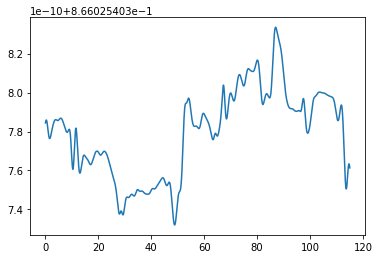

In [53]:
x0 = 0
y0 = np.zeros(33)
for i in range(11):
    r = 2 * (np.random.rand(3) - 0.5)
    r = r / np.linalg.norm(r) * 3 ** 0.5 / 2
    y0[3 * i] = r[0]
    y0[3 * i + 1] = r[1]
    y0[3 * i + 2] = r[2]
t, a = runge(115, 0.01, x0, y0, sys_spin)
M = Mx(115, 0.01, a)
L = splen(115, 0.01, a)
plt.plot(t, L)

In [ ]:
F_av = []
for i in range(1500):
    s = 0
    for j in range(100):
        s += F_mas[j][i] / 100
    F_av.append(s)
l = t[:1500]

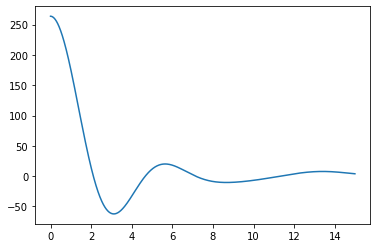

In [15]:
# Plotting F(t)
plt.plot(l, F_av)
plt.show()

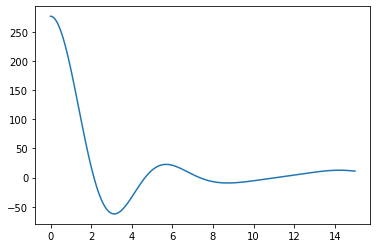

In [16]:
F_av = []
for i in range(1500):
    s = 0
    for j in range(50):
        s += F_mas[j][i] / 50
    F_av.append(s)
l = t[:1500]
plt.plot(l, F_av)
plt.show()

# Problem 3

In [10]:
s = 0
for i in range(10000): 
    r = np.random.rand(1)[0]
    s += ((120*r + 49) ** 0.5 - 10) / 3
s /= 10000
print(s)

0.09713944313091433


In [23]:
n = 1000

In [26]:
M_mas = []
S = 3 ** 0.5 / 2
x0 = 0
for k in range(n):
    y0 = np.zeros(33)
    for i in range(11):
        r = np.random.uniform(0, 1)
        ph = np.random.uniform(0, 2 * pi)
        Sx = ((120*r + 49) ** 0.5 - 10) / 3
        y0[3 * i] = Sx * S
        y0[3 * i + 1] = (1 - Sx ** 2) ** 0.5 * cos(ph) * S
        y0[3 * i + 2] = (1 - Sx ** 2) ** 0.5 * sin(ph) * S
    t, a = runge(15, 0.01, x0, y0, sys_spin)
    M = Mx(15, 0.01, a)
    #plt.plot(t[:1501], M)
    #plt.show()
    M_mas.append(M)

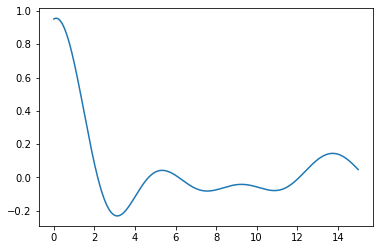

In [27]:
M_av = []
for i in range(1501):
    s = 0
    for j in range(n):
        s += M_mas[j][i] / n
    M_av.append(s)
plt.plot(t[:1501], M_av)
plt.show()